# The Battle of Neighborhoods for "Applied Data Science Capstone" Course

## 1. Description

This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade. The project will be completed over the course of 2 weeks. Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade.

1. For first week, you will required to submit the following:
    - A description of the problem and a discussion of the background. (15 marks)
    - A description of the data and how it will be used to solve the problem. (15 marks)


2. For the second week, the final deliverables of the project will be:
    - A link to your Notebook on your Github repository, showing your code. (15 marks)
    - A full report consisting of all of the following components (15 marks):
        - Introduction where you discuss the business problem and who would be interested in this project.
        - Data where you describe the data that will be used to solve the problem and the source of the data.
        - Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
        - Results section where you discuss the results.
        - Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
        - Conclusion section where you conclude the report.
     
     
3. Your choice of a presentation or blogpost. (10 marks)

## 2. The first week

### The description of the problem and a discussion of the background

**The problem**

In a hypothetical situation, I play a role as a data scientist to support a fashion retailer to open new stores in busy traffic areas in Paris, France

I have been given the interesting task of helping them make data-driven decisions on the new locations that are most suitable for their new stores in Paris. This will be a main element of their decision-making process, the other being on the ground qualitative analysis of districts once when the report for this data is reviewed and studied.

This fashion retailer is positioned in the upper end of the fast fashion market. Therefore, they only focus to high traffic areas where consumers go for shopping, restaurants and entertainment. Foursquare data will be very helpful in making data-driven decisions about the best of those areas.

The goal of this problem is to identify the best districts to open new stores as part of the company's plan. The results will be translated into management in a simple form that will convey the data-driven analysis of the best locations to open stores.

**The discussion for the background**

Qualitative data from another retailer that they know, suggests that the best locations to open new fashion retail stores may not only be where other clothing is located. This data strongly suggests that the best places are in fact areas that are near French Restaurants, Cafés and Wine Bars. Parisians are very social people that frequent these places often, so opening new stores in these locations are becoming popular.

The analysis and recommendations for new store locations will focus on general districts with these establishments, not on specific store addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the company's personnel.

Without leveraging data to make decisions about new store locations, the company could spend countless hours walking around districts, consulting many real estate agents with their own district biases, and end up opening in yet another location that is not ideal.

The data will provide better answers and better solutions to their task at hand.

### The description of the data and how it will be used to solve the problem

The main districts in Paris are divided into 20 administrative districts, shortened to arrondissements. This data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

- Wikipedia page: https://en.wikipedia.org/wiki/Arrondissements_of_Paris

- Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

- Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/


The data regarding the districts in Paris need to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand is most interested in opening new stores.

- **Outline the initial data that is required:**
 - District data for Paris including names, location data if available, and any other details required.


- **Obtain the Data:**
 - Research and find suitable sources for the district data for Paris.
 - Access and explore the data to determine if it can be manipulated for our purposes.
 
 
- **Initial Data Wrangling and Cleaning:**
 - Clean the data and convert to a useable form as a dataframe.
 

- **Data Analysis and Location Data:**
 
 - Foursquare location data will be leveraged to explore or compare districts around Paris.

 - Data manipulation and analysis to derive subsets of the initial data.
 
 - Identifying the high traffic areas using data visualisation and tatistical nalysis.


- **Visualization:**

 - Analysis and plotting visualizations.

 - Data visualization using various mapping libraries.
 

- **Discussion and Conclusions:**

 - Recomendations and results based on the data analysis.
 
 - Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

## 3. The second week

### 3.1. Data Research and Preparation

**Import the Required Libraries**

In [1]:
# library to handle data in a vectorized manner
import numpy as np

# library to handle JSON files
import json

# library to handle data in dataframe
import pandas as pd

# library to convert an address into latitude and longitude values
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

# library to handle requests
import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# library to map rendering library
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium

print("Libraries imported successfully!")

Libraries imported successfully!


**Import the Paris District Data**

Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Data for the arrondissements is necessary to select the most suitable of these areas for new stores. This data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

- Wikipedia: https://en.wikipedia.org/wiki/Arrondissements_of_Paris

- Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

- Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/

In [2]:
# Download the dataset and read it into a pandas dataframe.
# The Arrondissements dataset was downloaded from Paris|DATA: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

paris = pd.read_csv("https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv")
print("The Paris District Dataset is ready!")
paris.head()

The Paris District Dataset is ready!


,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325


### 3.2. Exploring, Wrangling, Cleaning and Understanding the Data

**Rename the columns 'Geometry_X' and 'Geometry_Y', "CAR', ...**

In [3]:
# Rename the necessary columns 'Geometry_X and Geometry_Y'
# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
print("The Paris District Dataset after renaming is ready!")
paris.head()

The Paris District Dataset after renaming is ready!


,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325


**Clean up the dataset to remove unnecessary columns**

In [4]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
print("The Paris District Dataset after removing unnecessary columns is ready!")
paris.head()

The Paris District Dataset after removing unnecessary columns is ready!


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325


**Check the shape of the dataframe**

In [5]:
# Check the shape of the dataframe
print("The shape of this  dataframe: {}".format(paris.shape))

The shape of this  dataframe: (20, 5)


### 3.3. Exploratory Data Analysis

**Use the geopy library to get the latitude and longitude values of Paris**

In [6]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim

# Define the user_agent as Paris_explorer
address = "Paris"
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of Paris, France: ({}, {})".format(latitude, longitude))

The geographical coordinates of Paris, France: (48.8566969, 2.3514616)


**Create a map of Paris with superimposed districts**

In [7]:
# Create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  

print("The Paris map with superimposed districts is ready!")
map_paris

The Paris map with superimposed districts is ready!


**Use the Foursquare API to explore the arrondissements of Paris**

In [8]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'LUKJM255UKL3FIML4YOGBETFOBBC3QENCIECEHQOHL4GUDPF' # your Foursquare ID
CLIENT_SECRET = 'V2D4D23P3L4UCGGOJ5HS0LBYAJRRGJITOTFXAOUMPB0J2QRJ' # your Foursquare Secret
VERSION = "20200303" # Foursquare API version

print("CLIENT_ID: {}".format(CLIENT_ID))
print("CLIENT_SECRET: {}".format(CLIENT_SECRET))
print("CLIENT_VERSION: {}".format(VERSION))
print("My credentails is ready!")

CLIENT_ID: LUKJM255UKL3FIML4YOGBETFOBBC3QENCIECEHQOHL4GUDPF
CLIENT_SECRET: V2D4D23P3L4UCGGOJ5HS0LBYAJRRGJITOTFXAOUMPB0J2QRJ
CLIENT_VERSION: 20200303
My credentails is ready!


**Explore the latitude and longitude values of the first arrondissement in my dataframe to become familiar with the data**

In [9]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value
neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print("The geographical coordinates of the neighborhood {}: ({}, {})".
      format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))

The geographical coordinates of the neighborhood 3eme Ardt: (48.86287238, 2.3600009859999997)


**Get the top 100 venues that are in the neighborhood of the first arrondissement, within a radius of 500 meters**

In [10]:
# Use Foursquare
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# Send the GET request and examine the resutls
results = requests.get(url).json()

# Define the function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# Clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# Filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# Filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# Clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print("The {} venues that are in the neighborhood of the first arrondissement, How many venues are in the neighborhood of each arrondissement, within a radius of 500 meters?within a radius of {} meters is ready!"
      .format(LIMIT,radius))
nearby_venues.head()

The 100 venues that are in the neighborhood of the first arrondissement, How many venues are in the neighborhood of each arrondissement, within a radius of 500 meters?within a radius of 500 meters is ready!


,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
2,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
3,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
4,Square du Temple,Park,48.864475,2.360816


**How many venues are in the neighborhood of each arrondissement of Paris, within a radius of 500 meters?**

In [11]:
# Create a nearby venues function for all the neighborhoods in Paris
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes): 
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

# Create a new dataframe called paris_venues
paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude'])

print("The statistics of the number of venues are in the neighborhood of each arrondissement of Paris is ready!")
paris_venues.groupby('French_Name').count()

The statistics of the number of venues are in the neighborhood of each arrondissement of Paris is ready!


,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,69,69,69,69,69,69
12eme Ardt,6,6,6,6,6,6
13eme Ardt,61,61,61,61,61,61
14eme Ardt,26,26,26,26,26,26
15eme Ardt,68,68,68,68,68,68
16eme Ardt,13,13,13,13,13,13
17eme Ardt,58,58,58,58,58,58
18eme Ardt,47,47,47,47,47,47


**Analyze each arrondissement of Paris, within a radius of 500 meters, with the frequency of occurrence of each category**

In [12]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

# Group rows by neighborhood and take the mean of the frequency of occurrence of each category
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()

print("The frequencies of occurrence for each category of the number of venues, that are in the neighborhood of each arrondissement of Paris, is ready!")
paris_grouped

The frequencies of occurrence for each category of the number of venues, that are in the neighborhood of each arrondissement of Paris, is ready!


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.020000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,...,0.00,0.010000,0.00,0.000000,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000
1,11eme Ardt,0.014493,0.000000,0.000000,0.00,0.00,0.000000,0.014493,0.000000,0.014493,...,0.00,0.014493,0.00,0.014493,0.014493,0.043478,0.000000,0.014493,0.000000,0.000000
2,12eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667
3,13eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.196721,...,0.00,0.000000,0.00,0.000000,0.213115,0.000000,0.000000,0.000000,0.000000,0.000000
4,14eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,15eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.014706,0.014706,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.014706,0.000000,0.000000
6,16eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.076923,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,17eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.017241,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,18eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.021277,0.00,0.000000,0.021277,0.021277,0.000000,0.000000,0.000000,0.000000
9,19eme Ardt,0.000000,0.020833,0.020833,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000


**The top 10 venue categories for each neighborhood**

In [13]:
# First sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

print("The top 10 venue categories for the neighborhood of each arrondissement of Paris is ready!")
paris_venues_sorted

The top 10 venue categories for the neighborhood of each arrondissement of Paris is ready!


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Coffee Shop,Hotel,Café,Bistro,Indian Restaurant,Japanese Restaurant,Italian Restaurant,Pizza Place,Breakfast Spot
1,11eme Ardt,French Restaurant,Café,Restaurant,Supermarket,Wine Bar,Pastry Shop,Pizza Place,Japanese Restaurant,Theater,Bistro
2,12eme Ardt,Zoo Exhibit,Restaurant,Supermarket,Park,Monument / Landmark,Zoo,Creperie,Cultural Center,Fish & Chips Shop,Fast Food Restaurant
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,French Restaurant,Juice Bar,Bakery,Brasserie,Cambodian Restaurant,Discount Store
4,14eme Ardt,French Restaurant,Hotel,Bistro,Brasserie,Bakery,Pizza Place,Convenience Store,Fast Food Restaurant,Food & Drink Shop,Supermarket
5,15eme Ardt,Hotel,Italian Restaurant,French Restaurant,Coffee Shop,Thai Restaurant,Bistro,Lebanese Restaurant,Supermarket,Sushi Restaurant,Park
6,16eme Ardt,Plaza,Park,Lake,Bus Station,Pool,French Restaurant,Art Museum,Bus Stop,Boat or Ferry,Trail
7,17eme Ardt,French Restaurant,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Café,Bus Stop,Bistro,Restaurant,Plaza
8,18eme Ardt,Bar,French Restaurant,Café,Restaurant,Coffee Shop,Pizza Place,Convenience Store,Hotel,Seafood Restaurant,Middle Eastern Restaurant
9,19eme Ardt,French Restaurant,Bar,Supermarket,Hotel,Café,Beer Bar,Brewery,Seafood Restaurant,Bistro,Coffee Shop


**Look at their frequency of occurance for all the Paris neighborhoods, isolating the categorical venues**

These are the venue types that the client wants to have an abundant density of in the ideal store locations. I have used a violin plot from the seaborn library, a great way to visualise frequency distribution datasets, to display a density estimation of the underlying distribution.

I choose specified venues in a great frequency (French Restaurants, Cafés and Wine Bars)

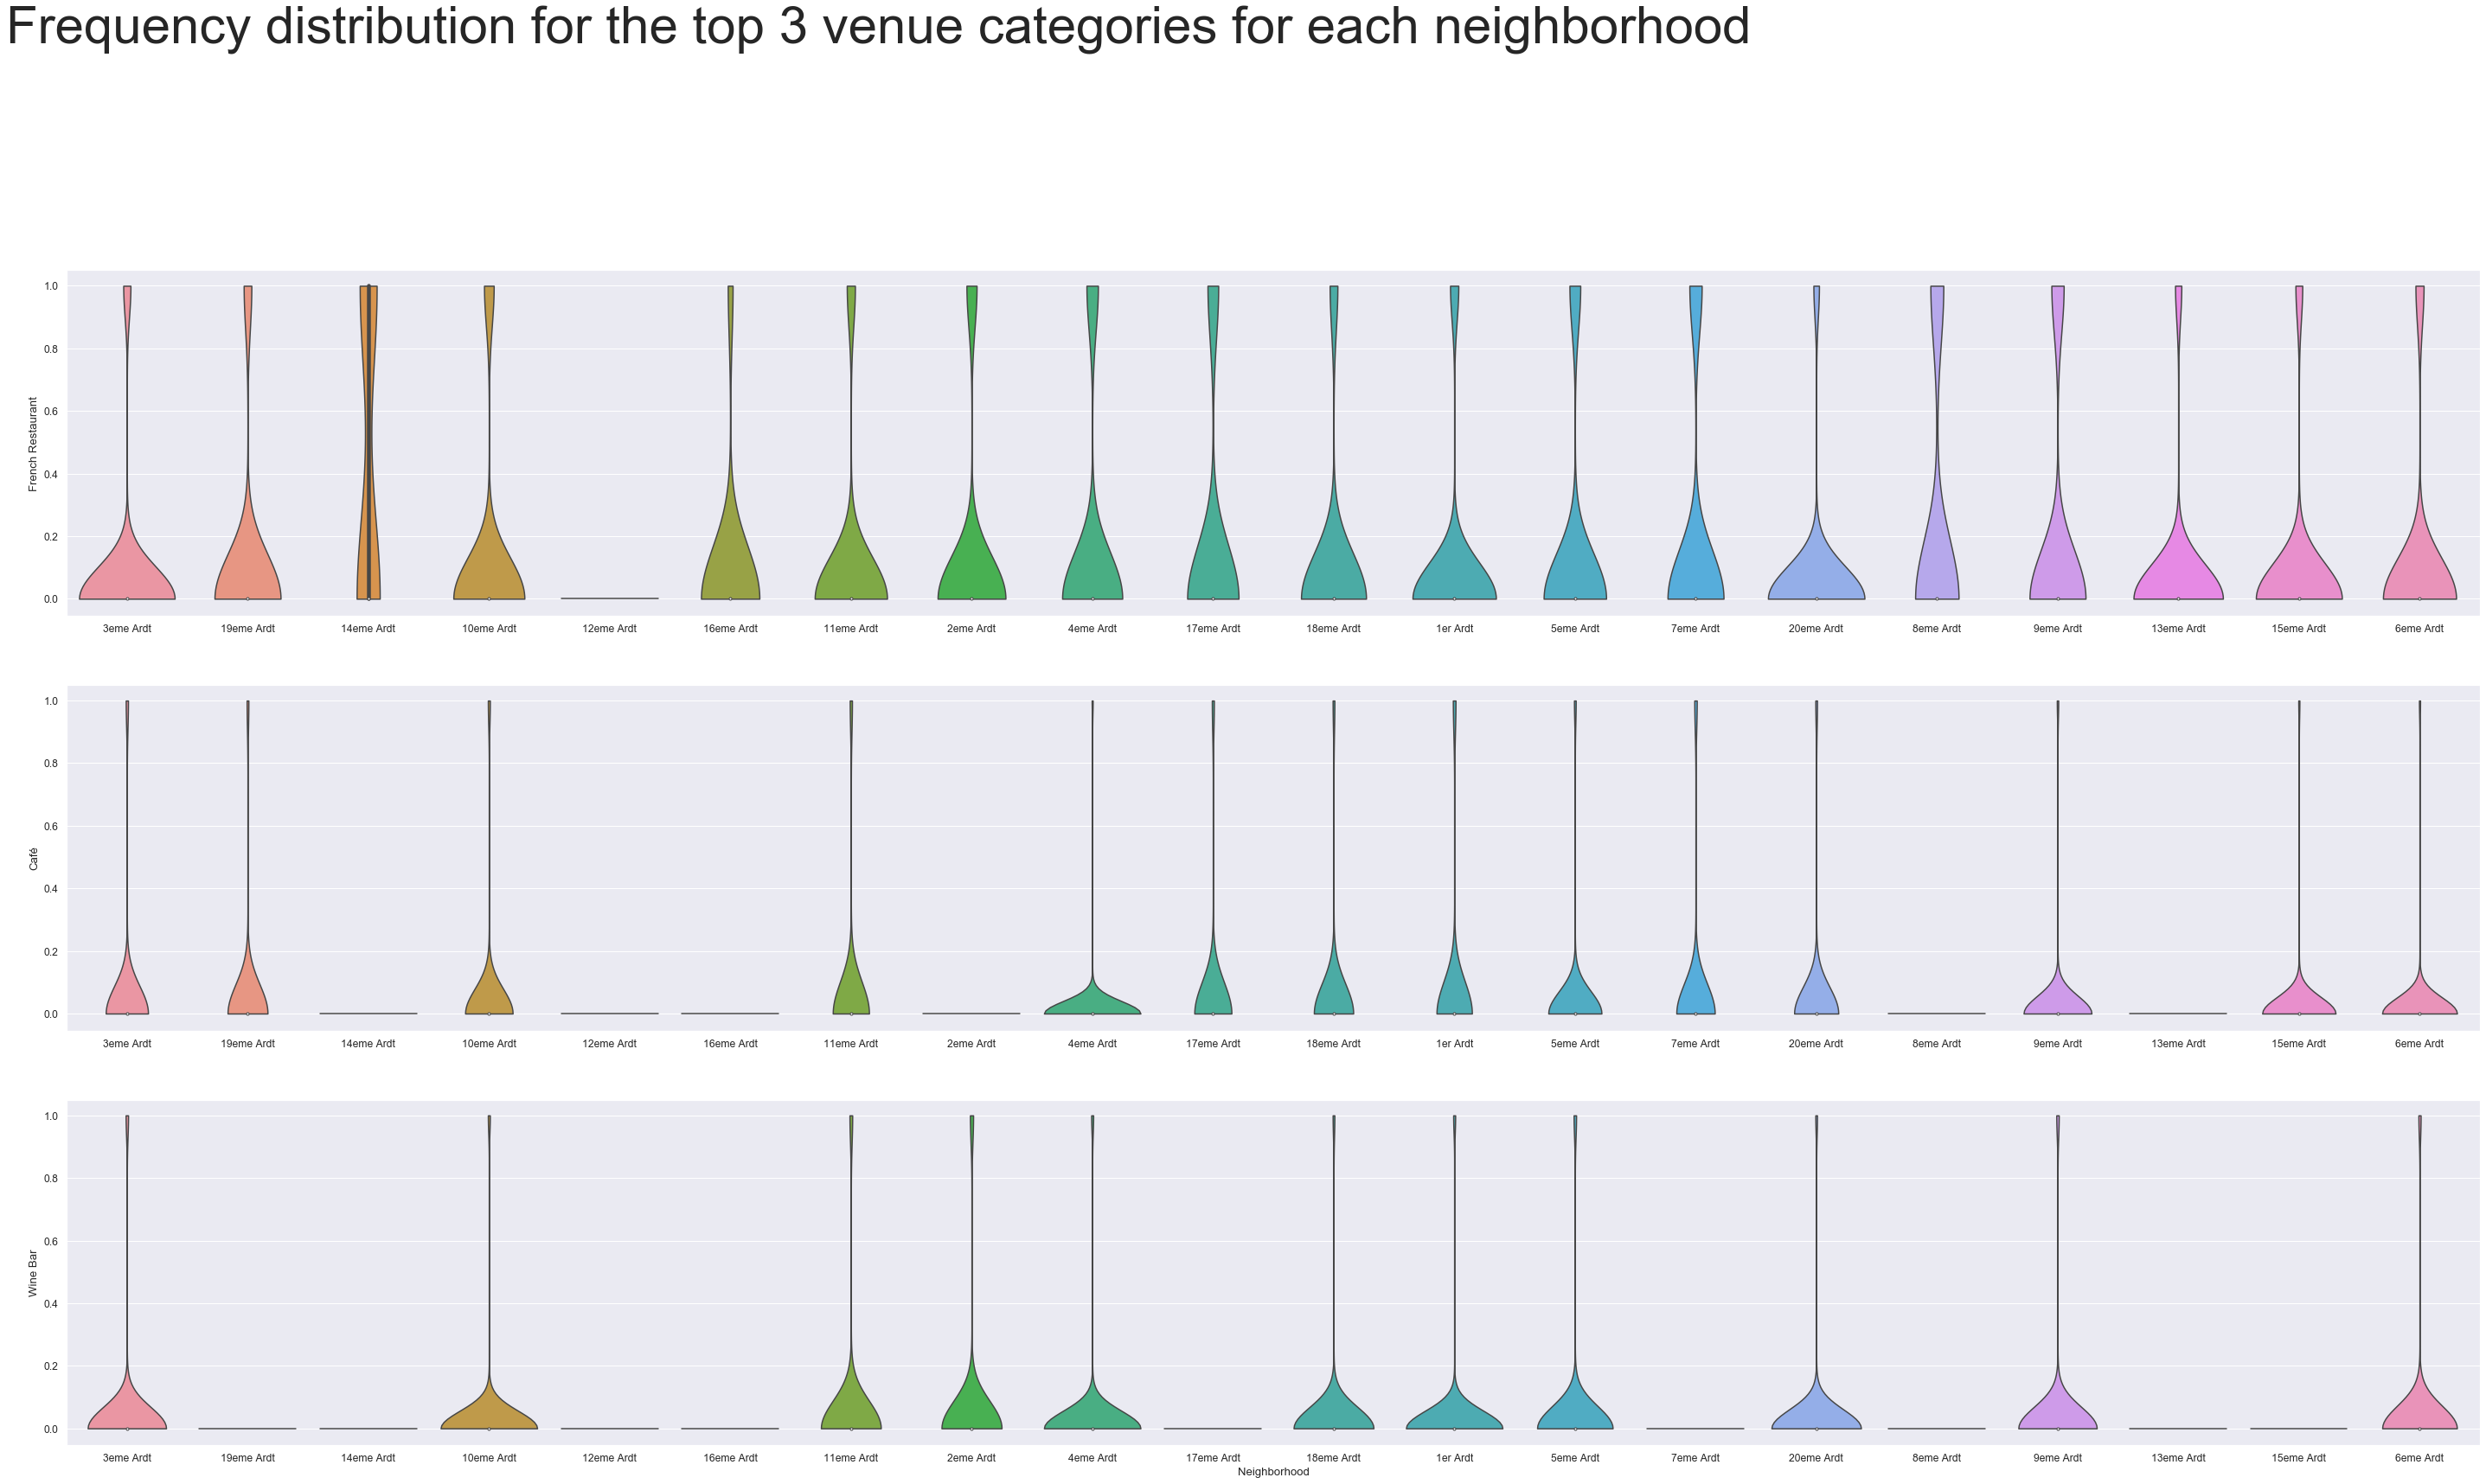

In [14]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, "Frequency distribution for the top 3 venue categories for each neighborhood", fontsize=60)
plt.savefig ("Frequency_Venues_3_Categories.png", dpi=240)
plt.show()

So from the analysis, there are 8 neighborhoods to open new stores, according to the criteria that they have the 3 specified venues in a greater frequency (French Restaurants, Cafés, and Wine Bars). They include as follows:

- 3eme Arrondissement
- 10eme Arrondissement
- 11eme Arrondissement
- 4eme Arrondissement
- 18eme Arrondissement
- 5eme Arrondissement
- 9eme Arrondissement
- 6eme Arrondissement

**Take this further with some Exploration and Inferential Analysis**

If we included the Clothing Store venue category in the analysis, then we might be able to make some inferences, based on the data, and economic knowledge, to focus the list.

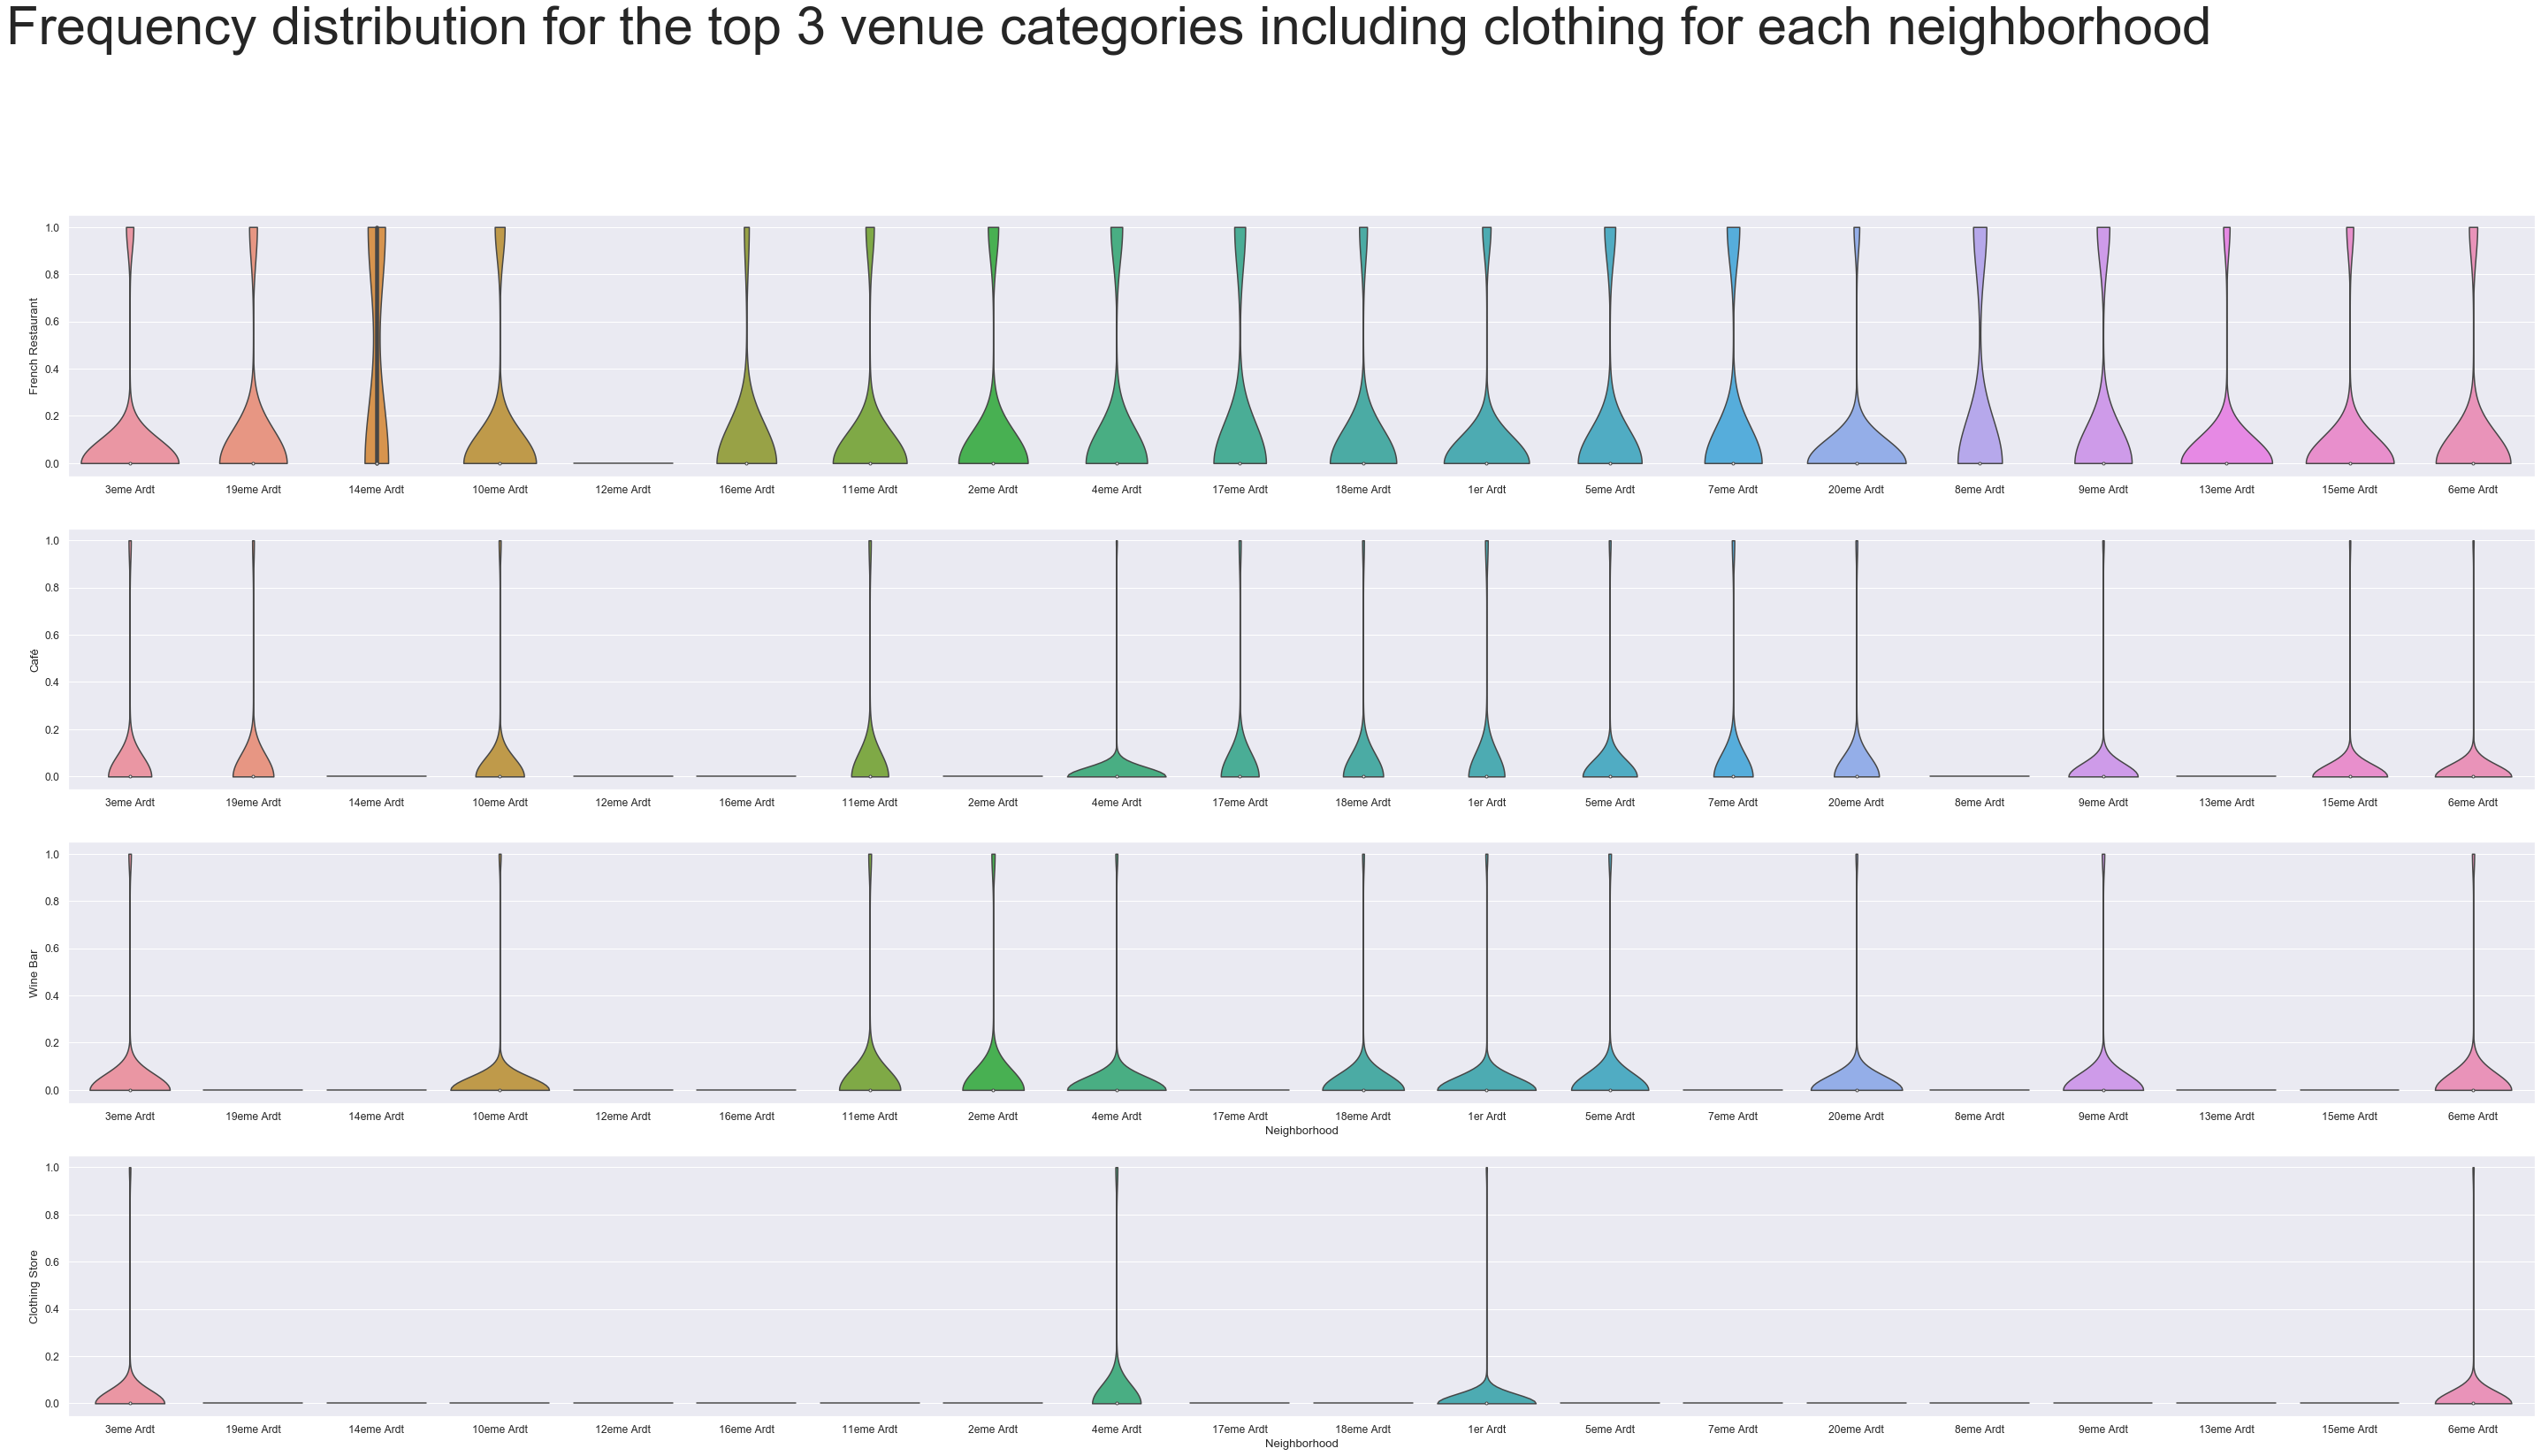

In [15]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, "Frequency distribution for the top 3 venue categories including clothing for each neighborhood", fontsize=60)
plt.savefig ("Frequency_Venues_4_Categories.png", dpi=240)
plt.show()

### 3.4. Result and Visualization

Inferential analysis using the data, as well as domain knowledge of retail and marketing, allow the list to be focussed to just 3 neighborhoods from the previous 8 neighborhoods.

Inferential analysis using the data, as well as domain knowledge of retail and marketing, allows the list to be focussed to just 3 neighbourhoods from the previous 8 neighbourhoods. So, the final  3 prospective neighborhoods for new fashion retail store locations are where 4 criteria,  Restaurants, Cafés, Wine Bars, and Clothing Stores, are met:

1. 3eme Arrondissement
2. 4eme Arrondissement
3. 6eme Arrondissement

In [16]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv("https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv")

# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(chosen_districts["Latitude"], chosen_districts["Longitude"], chosen_districts["French_Name"]):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=70,
        popup=label,
        color="blue",
        fill=True,
        fill_color="#3186cc",
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

### 3.5. Discussion and Conclusions

**Discussion**

I guess it is not a surprise that these districts are all very centrally located in the circular arrangement of Paris's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world. 

For this visualization it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districts is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's retail business.

We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new stores (i) to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.

**Conclusions**

There are many ways this analysis could have been performed based on different methodologies and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the criteria for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorithms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand.

The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on the data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and a way forward, these data-driven decisions will lead to a better solution in the end.